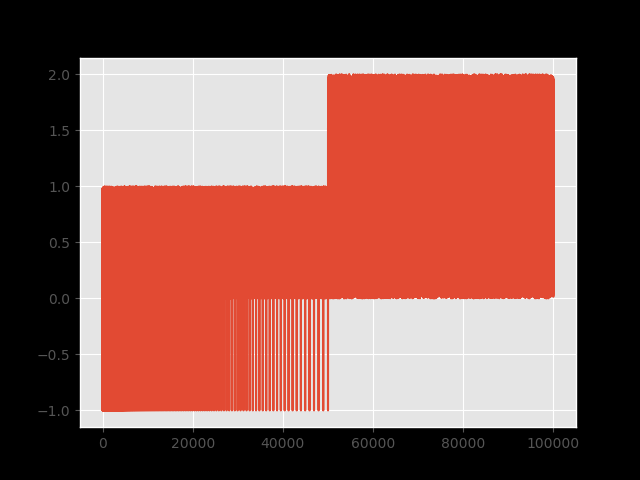

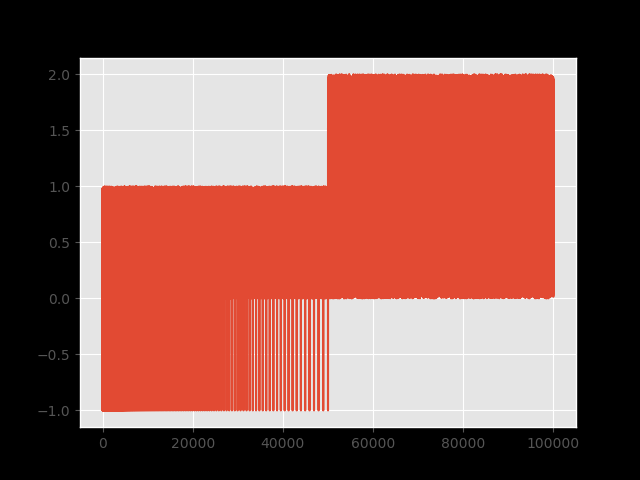

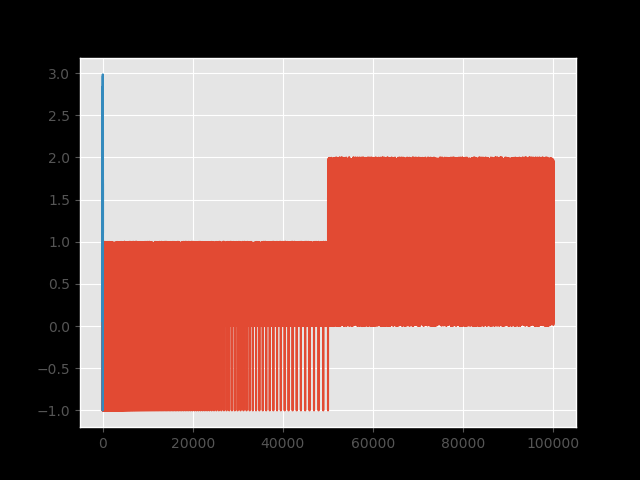

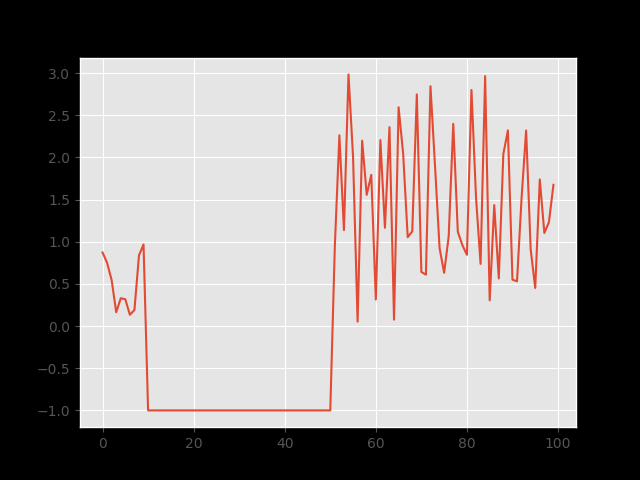

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.style as mplstyle
mplstyle.use('fast')

mplstyle.use(['dark_background', 'ggplot', 'fast'])
# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.geomspace(10, 50000, 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = False

mpl.rcParams['path.simplify_threshold'] = 0.0
plt.plot(y)
plt.show()

mpl.rcParams['path.simplify_threshold'] = 0.5
plt.plot(y)
plt.show()


plt.plot(y, markevery=20)

mpl.rcParams['path.simplify_threshold'] = 1.0

# Setup, and create the data to plot
y = np.random.rand(100)
y[50:] *= 3
y[np.geomspace(10, 50, 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

mpl.rcParams['agg.path.chunksize'] = 200
plt.plot(y)
plt.show()

mpl.rcParams['agg.path.chunksize'] = 10
plt.plot(y)
plt.show()



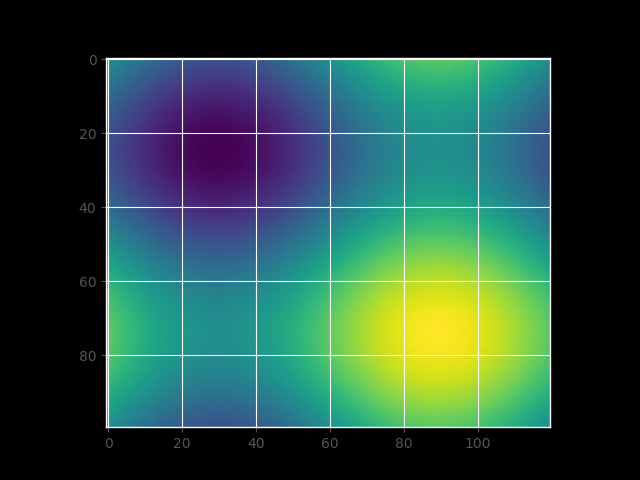

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

ims = []
for i in range(60):
    x += np.pi / 1.
    y += np.pi / 2.
    im = ax.imshow(f(x, y), animated=True)
    if i == 0:
        ax.imshow(f(x, y))  
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=5, blit=True,
                                repeat_delay=10)


plt.show()

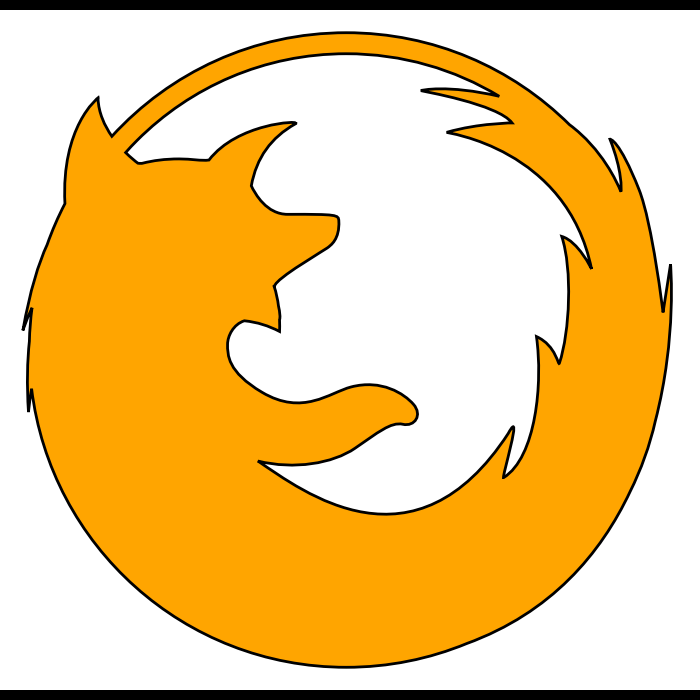

In [50]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches


firefox = "M28.4,22.469c0.479-0.964,0.851-1.991,1.095-3.066c0.953-3.661,0.666-6.854,0.666-6.854l-0.327,2.104c0,0-0.469-3.896-1.044-5.353c-0.881-2.231-1.273-2.214-1.274-2.21c0.542,1.379,0.494,2.169,0.483,2.288c-0.01-0.016-0.019-0.032-0.027-0.047c-0.131-0.324-0.797-1.819-2.225-2.878c-2.502-2.481-5.943-4.014-9.745-4.015c-4.056,0-7.705,1.745-10.238,4.525C5.444,6.5,5.183,5.938,5.159,5.317c0,0-0.002,0.002-0.006,0.005c0-0.011-0.003-0.021-0.003-0.031c0,0-1.61,1.247-1.436,4.612c-0.299,0.574-0.56,1.172-0.777,1.791c-0.375,0.817-0.75,2.004-1.059,3.746c0,0,0.133-0.422,0.399-0.988c-0.064,0.482-0.103,0.971-0.116,1.467c-0.09,0.845-0.118,1.865-0.039,3.088c0,0,0.032-0.406,0.136-1.021c0.834,6.854,6.667,12.165,13.743,12.165l0,0c1.86,0,3.636-0.37,5.256-1.036C24.938,27.771,27.116,25.196,28.4,22.469zM16.002,3.356c2.446,0,4.73,0.68,6.68,1.86c-2.274-0.528-3.433-0.261-3.423-0.248c0.013,0.015,3.384,0.589,3.981,1.411c0,0-1.431,0-2.856,0.41c-0.065,0.019,5.242,0.663,6.327,5.966c0,0-0.582-1.213-1.301-1.42c0.473,1.439,0.351,4.17-0.1,5.528c-0.058,0.174-0.118-0.755-1.004-1.155c0.284,2.037-0.018,5.268-1.432,6.158c-0.109,0.07,0.887-3.189,0.201-1.93c-4.093,6.276-8.959,2.539-10.934,1.208c1.585,0.388,3.267,0.108,4.242-0.559c0.982-0.672,1.564-1.162,2.087-1.047c0.522,0.117,0.87-0.407,0.464-0.872c-0.405-0.466-1.392-1.105-2.725-0.757c-0.94,0.247-2.107,1.287-3.886,0.233c-1.518-0.899-1.507-1.63-1.507-2.095c0-0.366,0.257-0.88,0.734-1.028c0.58,0.062,1.044,0.214,1.537,0.466c0.005-0.135,0.006-0.315-0.001-0.519c0.039-0.077,0.015-0.311-0.047-0.596c-0.036-0.287-0.097-0.582-0.19-0.851c0.01-0.002,0.017-0.007,0.021-0.021c0.076-0.344,2.147-1.544,2.299-1.659c0.153-0.114,0.55-0.378,0.506-1.183c-0.015-0.265-0.058-0.294-2.232-0.286c-0.917,0.003-1.425-0.894-1.589-1.245c0.222-1.231,0.863-2.11,1.919-2.704c0.02-0.011,0.015-0.021-0.008-0.027c0.219-0.127-2.524-0.006-3.76,1.604C9.674,8.045,9.219,7.95,8.71,7.95c-0.638,0-1.139,0.07-1.603,0.187c-0.05,0.013-0.122,0.011-0.208-0.001C6.769,8.04,6.575,7.88,6.365,7.672c0.161-0.18,0.324-0.356,0.495-0.526C9.201,4.804,12.43,3.357,16.002,3.356z"  # noqa


def svg_parse(path):
    commands = {'M': (Path.MOVETO,),
                'L': (Path.LINETO,),
                'Q': (Path.CURVE3,)*2,
                'C': (Path.CURVE4,)*3,
                'Z': (Path.CLOSEPOLY,)}
    vertices = []
    codes = []
    cmd_values = re.split("([A-Za-z])", path)[1:] 
    for cmd, values in zip(cmd_values[::2], cmd_values[1::2]):
        
        points = ([*map(float, re.split(",|(?<!^)(?=[+-])", values))] if values
                  else [(0., 0.)]) 
        points = np.reshape(points, (-1, 2))
        if cmd.islower():
            points += vertices[-1][-1]
        codes.extend(commands[cmd.upper()])
        vertices.append(points)
    return np.array(codes), np.concatenate(vertices)



codes, verts = svg_parse(firefox)
path = Path(verts, codes)

xmin, ymin = verts.min(axis=0) - 1
xmax, ymax = verts.max(axis=0) + 1

fig = plt.figure(figsize=(7, 7), facecolor="0.75")  # gray background
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1,
                  xlim=(xmin, xmax),  # centering
                  ylim=(ymax, ymin),  # centering, upside down
                  xticks=[], yticks=[])  # no ticks


ax.add_patch(patches.PathPatch(path, facecolor='none', edgecolor='w', lw=500))

ax.add_patch(patches.PathPatch(path, facecolor='orange', edgecolor='k', lw=2))

plt.show()  

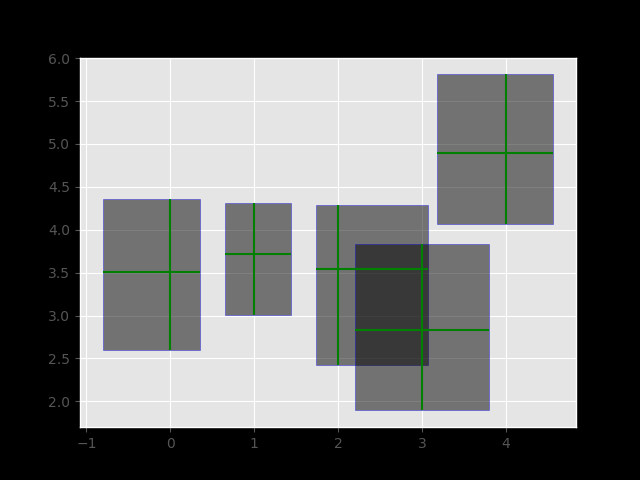

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle


n = 5


np.random.seed(19680801)
x = np.arange(0, n, 1)
y = np.random.rand(n) * 5.


xerr = np.random.rand(2, n) + 0.1
yerr = np.random.rand(2, n) + 0.2


def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='k',
                     edgecolor='blue', alpha=0.5):

    
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

   
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

 
    ax.add_collection(pc)

    
    artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
                          fmt='none', ecolor='g')

    return artists



fig, ax = plt.subplots(1)


_ = make_error_boxes(ax, x, y, xerr, yerr)

plt.show()

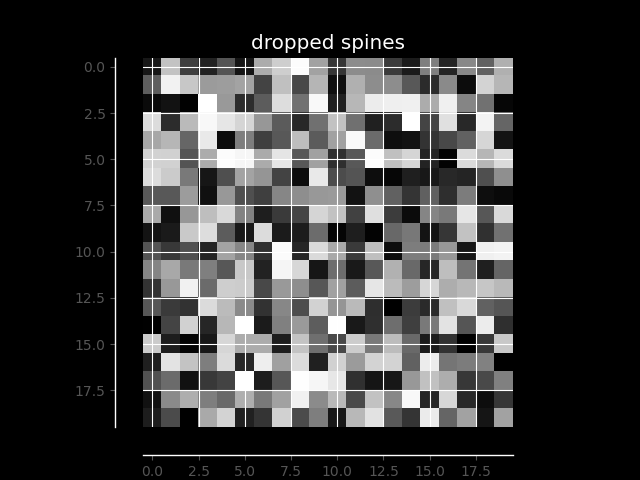

In [57]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(19)

fig, ax = plt.subplots()

image = np.random.uniform(size=(20, 20))
ax.imshow(image, cmap=plt.cm.gray)
ax.set_title('dropped spines')


ax.spines.left.set_position(('outward', 20))
ax.spines.bottom.set_position(('outward', 20))
# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()